# Random Forest Problem 2

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest Ensemble can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

### Data Description:

Let’s consider a Company dataset with around 10 variables and 400 records. 


The attributes are as follows: 
- Sales -- Unit sales (in thousands) at each location
- Competitor Price -- Price charged by competitor at each location
- Income -- Community income level (in thousands of dollars)
- Advertising -- Local advertising budget for company at each location (in thousands of dollars)
- Population -- Population size in region (in thousands)
- Price -- Price company charges for car seats at each site
- Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
- Age -- Average age of the local population
- Education -- Education level at each location
- Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
- US -- A factor with levels No and Yes to indicate whether the store is in the US or not 

## Steps:

1. Import new data set
    - understand the dataset, look into it. 
    - add the new column fraud
    - perform EDA.
    - check data info and null values.
2. Visualisation EDA
    - making pairplot graphs to better understand the data.   
3. Feature engineering
    - understand all features involeved.
    - list out features that needs to be considered in the model.
    - get dummies if required
    - Train | test spilliting
4. Random Forest Classifier
    - Default Parameters
    - Evaluation
    - K-Fold valuation
    - Report Model Function
5. Building the Final Model
    - model report
    - Feature importance
6. Visualisation of Trees estimators
    - Single tree estimator
    - Multiple tree estimators
7. Conclusion

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

## Import New Dataset

In [2]:
raw_data = pd.read_csv("C:/Users/Assignment/15_random_forests/15Q2/Company_Data.csv")
df = raw_data.copy()
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


<AxesSubplot:xlabel='Sales', ylabel='Count'>

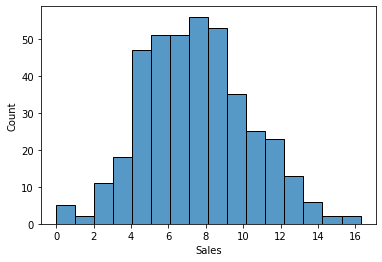

In [3]:
sns.histplot(df.Sales)
#We need to categorize this data using a mean threshold.
#Values greater than mean would indicate high sales and those lesser would be low sales.

In [4]:
#def func to assign fraud risky and good values

def filt(x):
    if x<= np.mean(df.Sales):
        return 'Low Sale'
    else: 
        return 'High Sale'

In [5]:
df['sales_cat'] = df['Sales'].copy()
df['sales_cat'] = df['sales_cat'].apply(filt)
df.pop('Sales')
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sale
1,111,48,16,260,83,Good,65,10,Yes,Yes,High Sale
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sale
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sale
4,141,64,3,340,128,Bad,38,13,Yes,No,Low Sale


In [6]:
df.sales_cat.value_counts()

Low Sale     201
High Sale    199
Name: sales_cat, dtype: int64

In [7]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['US']= label_encoder.fit_transform(df['US']) 
df['sales_cat']= label_encoder.fit_transform(df['sales_cat'])

df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [8]:
df.sales_cat.value_counts()
#Low Sale = 1
#High Sale = 0

1    201
0    199
Name: sales_cat, dtype: int64

In [9]:
df.info() # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int32
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int32
 9   US           400 non-null    int32
 10  sales_cat    400 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 28.2 KB


In [10]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000,0.50250
std,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113,0.50062
min,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.00000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000,0.00000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000,1.00000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000,1.00000
max,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000,1.00000


## Visualization

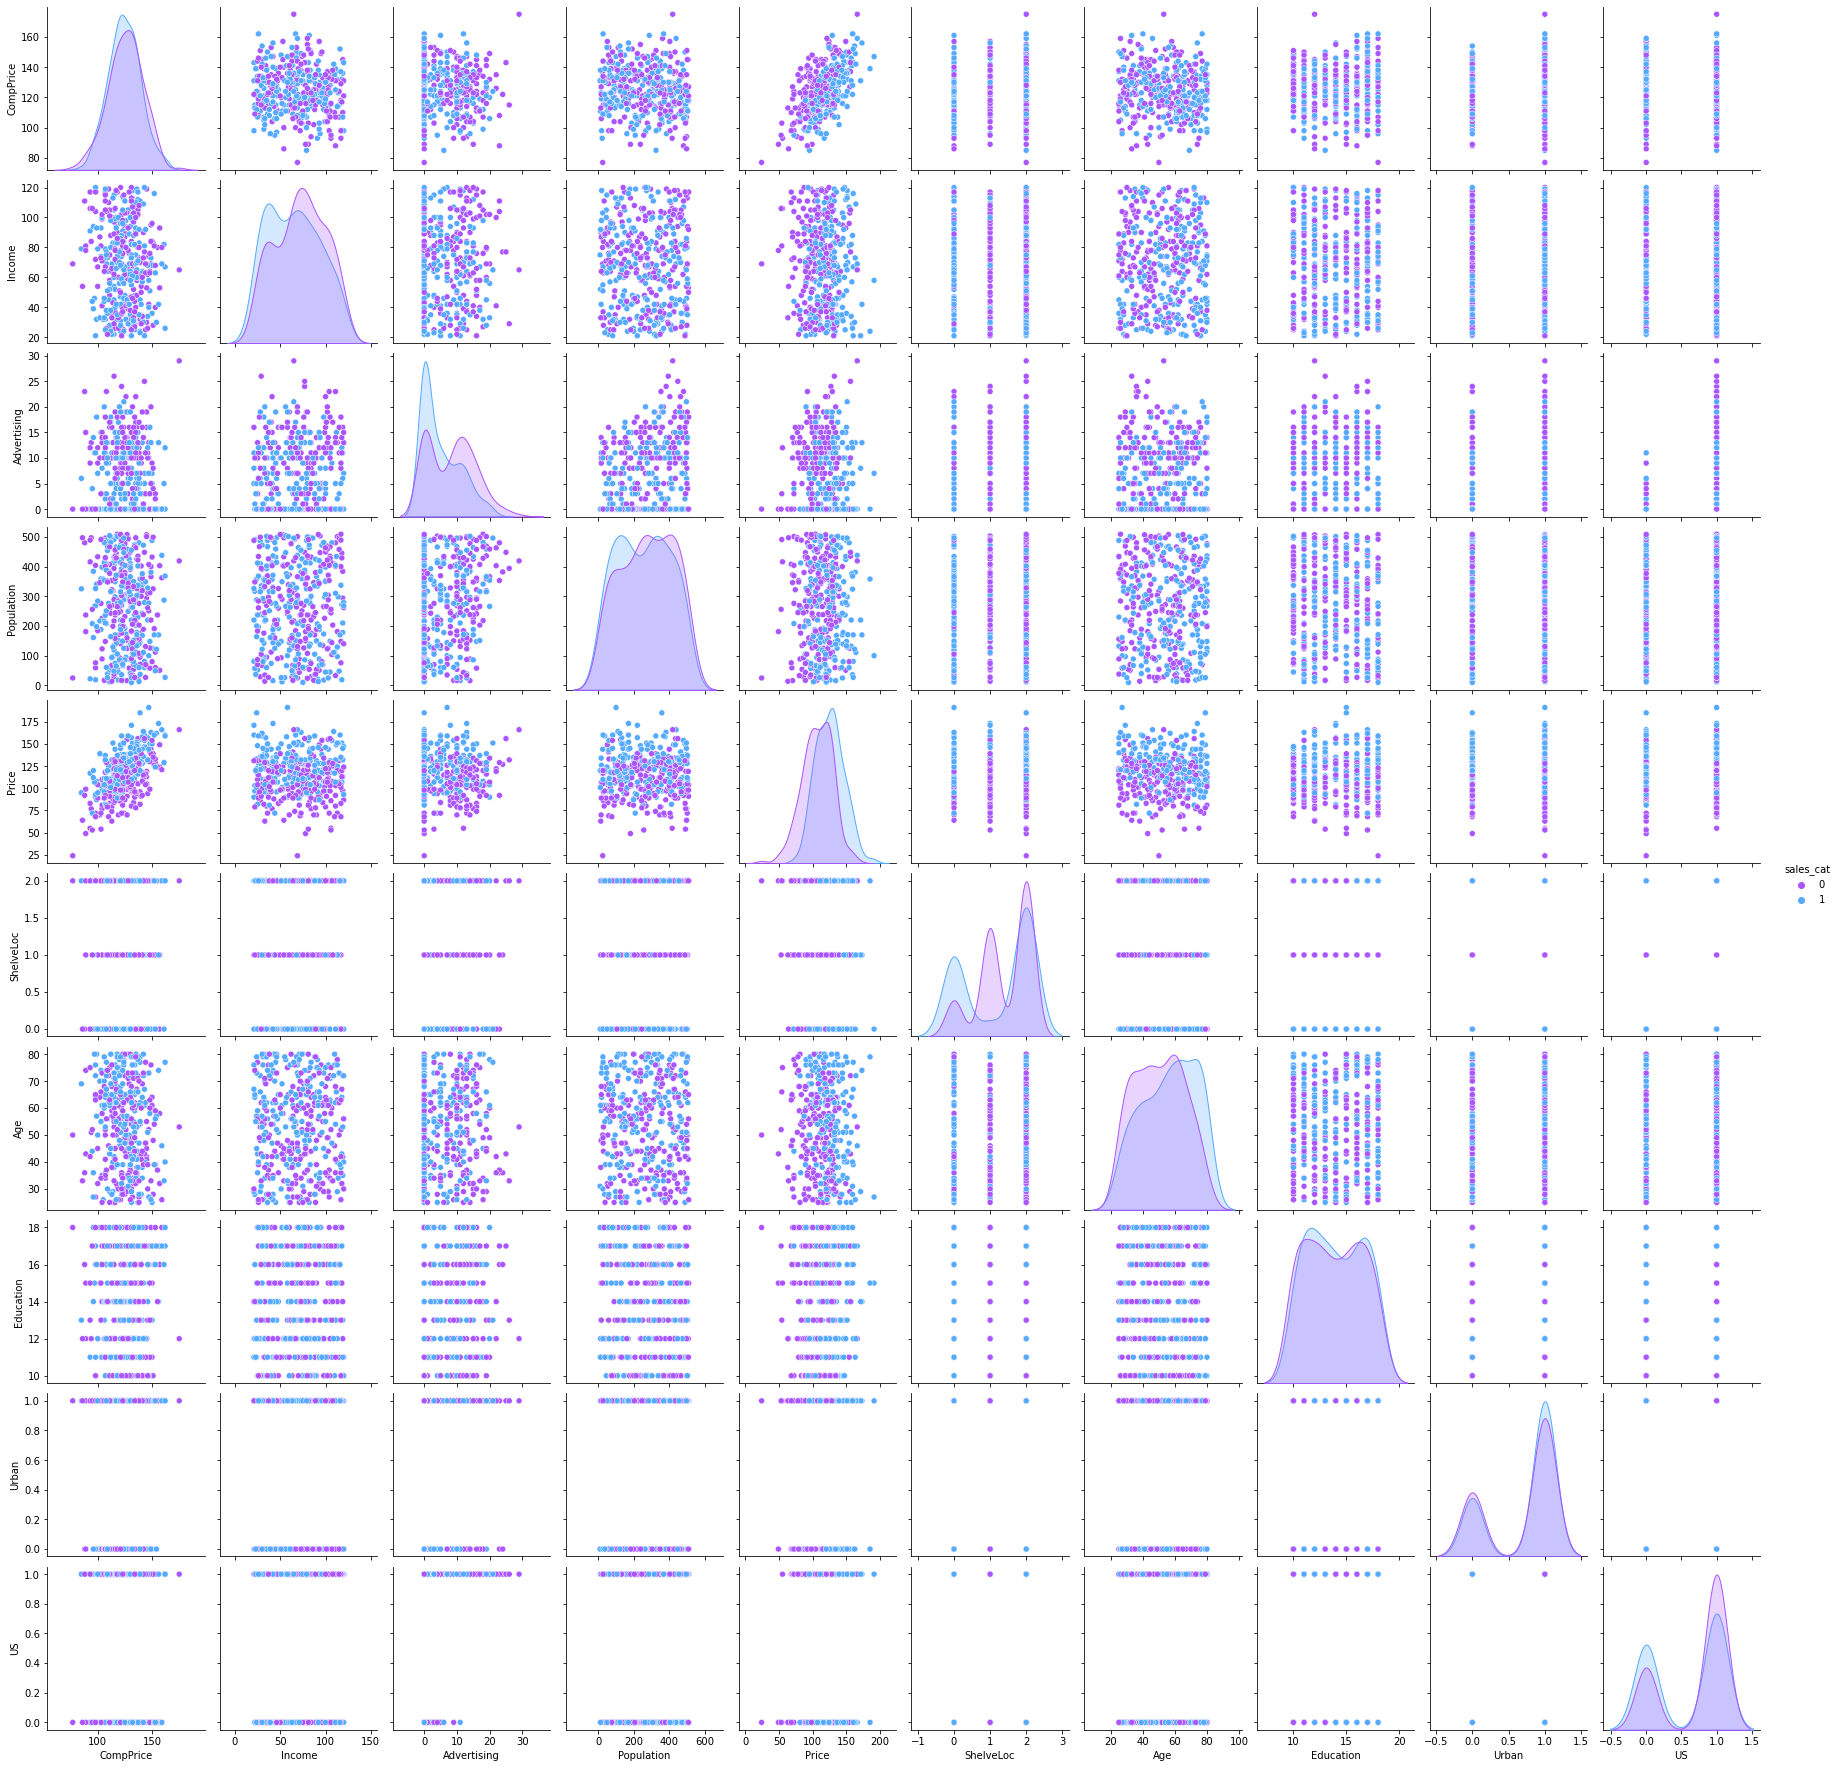

In [11]:
sns.pairplot(df,hue='sales_cat',palette='cool_r')

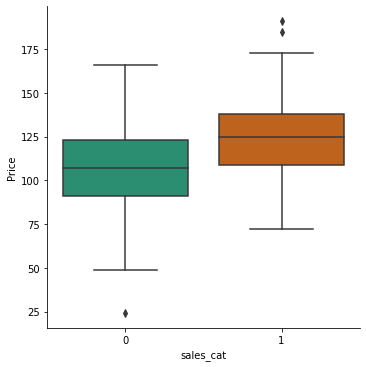

In [12]:
sns.catplot(x='sales_cat',y='Price',data=df,kind='box',palette='Dark2')

## Feature Engineering

All the features in the dataset are relevant and can be used for model training.
There are no dummies in the dataset.

### Train and Test Split data

In [13]:
X = df.iloc[:,:-1]
y =df.sales_cat

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Random Forest Classifier
### Default Parameters

In [15]:
model =  RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [16]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [17]:
base_pred = model.predict(X_test)

### Evaluation

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [19]:
confusion_matrix(y_test,base_pred) #Compared to previous CART values, this model is much better

array([[46, 14],
       [12, 48]], dtype=int64)

C:\Users\sanju\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


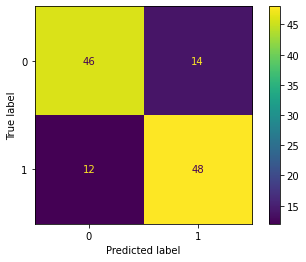

In [20]:
plot_confusion_matrix(model,X_test,y_test)

In [21]:
print(classification_report(y_test,base_pred)) #All values have increased very well compared to CART values

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        60
           1       0.77      0.80      0.79        60

    accuracy                           0.78       120
   macro avg       0.78      0.78      0.78       120
weighted avg       0.78      0.78      0.78       120



In [22]:
model.feature_importances_

array([0.1049395 , 0.12700226, 0.09603462, 0.10197808, 0.24570997,
       0.092216  , 0.14744317, 0.03846461, 0.027119  , 0.01909278])

In [23]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']) 
#good dependence on Price,Income, CompPrice, Population and Age segments
#Least dependence on Urban and US segments 
#CART dependencies where much different as compared to this one. 

,Feature Importance
CompPrice,0.104940
Income,0.127002
Advertising,0.096035
Population,0.101978
Price,0.245710
ShelveLoc,0.092216
Age,0.147443
Education,0.038465
Urban,0.027119
US,0.019093


### K-Fold Valuation

In [24]:
num_trees = 100
max_features = 6
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model2, X, y, cv=kfold)
print(results.mean()) #This is a good score for the model 

0.8275


### Report Model Function

In [25]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))

## Building Final Model

In [26]:
fnl_model = RandomForestClassifier(n_estimators=100,max_features=6,random_state=120)

In [27]:
fnl_model.fit(X_train,y_train)

RandomForestClassifier(max_features=6, random_state=120)

In [28]:
report_model(fnl_model) #By far the best model that could be developed.

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        60
           1       0.79      0.82      0.80        60

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120



In [29]:
fnl_model.feature_importances_

array([0.14089185, 0.10264365, 0.10962907, 0.08329205, 0.26834252,
       0.08674554, 0.1389529 , 0.0458862 , 0.01399144, 0.00962477])

In [30]:
pd.DataFrame(index=X.columns,data=fnl_model.feature_importances_,columns=['Feature Importance']) 

,Feature Importance
CompPrice,0.140892
Income,0.102644
Advertising,0.109629
Population,0.083292
Price,0.268343
ShelveLoc,0.086746
Age,0.138953
Education,0.045886
Urban,0.013991
US,0.009625


## Visualizations

### Single estimator used in Random Forest

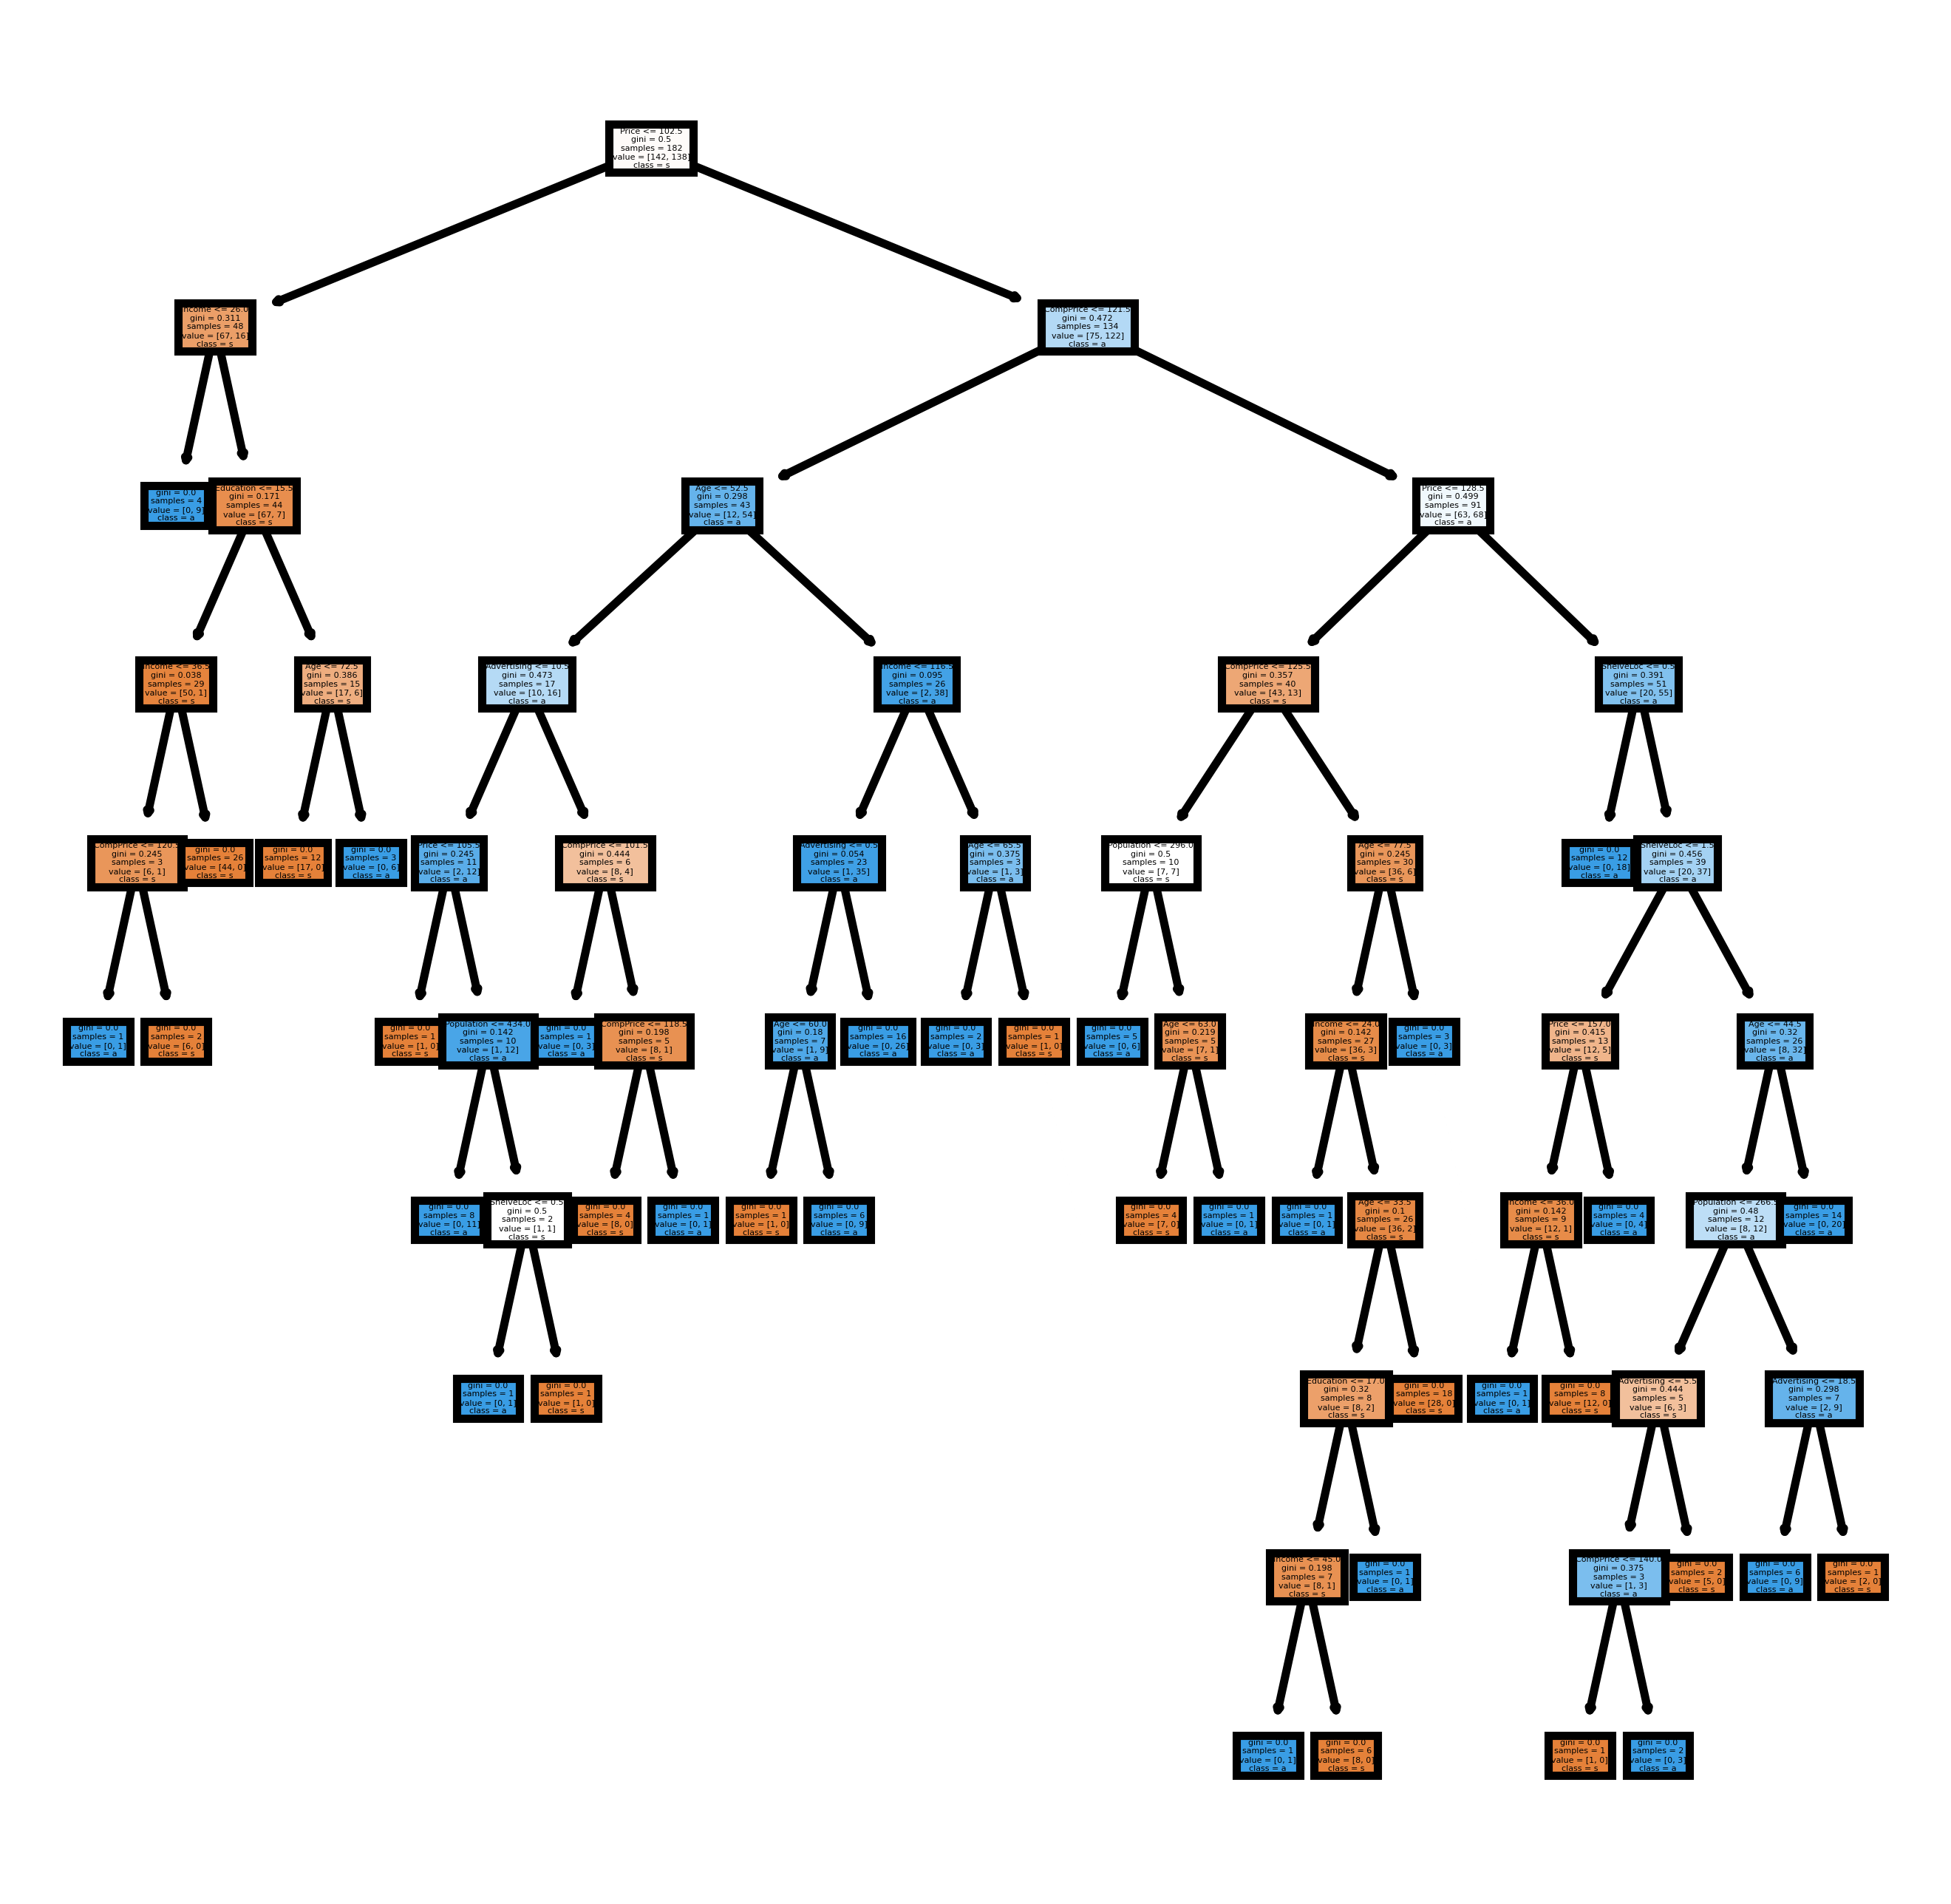

In [31]:
from sklearn import tree
fn=df.columns.values[:-1]
cn=df.columns.values[-1]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(fnl_model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Visualization of multiple trees used as estimator

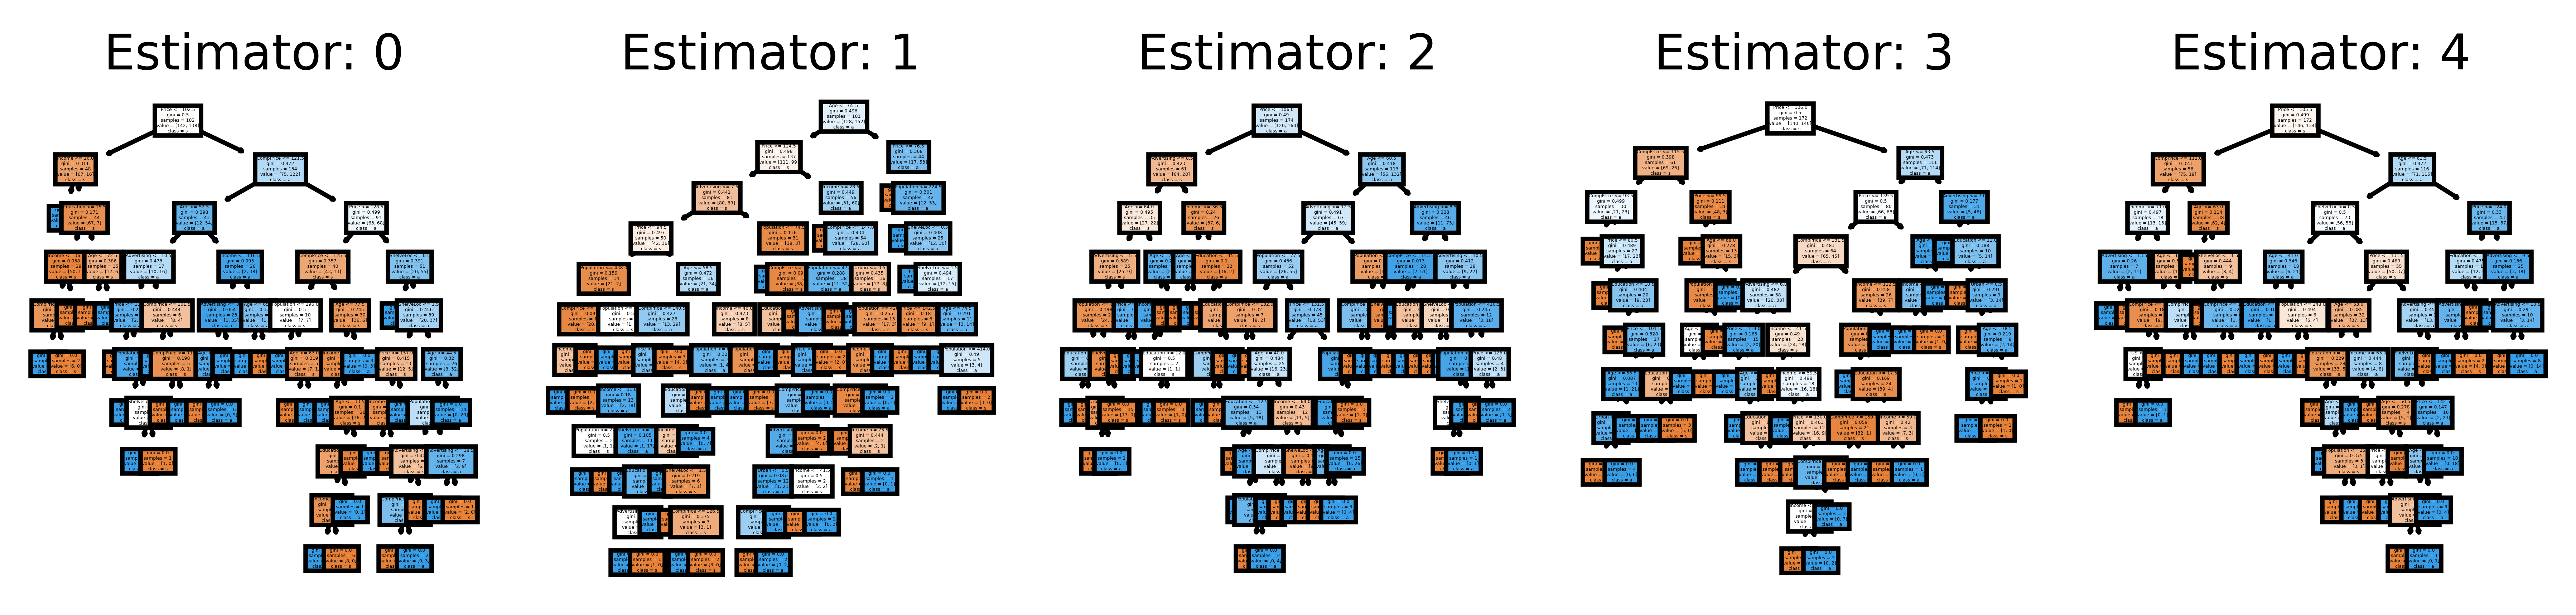

In [32]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900) 
for index in range(0, 5):
    tree.plot_tree(fnl_model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

## Conclusion

- Random Forest ensemble technique was applied to the dataset.
- Recieved much better results as compared to CART technique. 
- K-Fold evaluation revealed a max score of 83% on one model evaluation.
- The model perfoms very well as compared to the Decision Tree model before. 
- Several tree estimators were plotted at the end.
- Mutiple tree estimators create an artwork if plotted to full-scale